### Imports

In [12]:
import json
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

### Load the JSON data

In [13]:
with open("../data/raw/steamspy.json") as f:
    data = json.load(f)

df = pd.DataFrame(data).T
df.head()

,appid,name,developer,publisher,score_rank,positive,negative,userscore,owners,average_forever,average_2weeks,median_forever,median_2weeks,price,initialprice,discount,ccu
730,730,Counter-Strike: Global Offensive,Valve,Valve,,7642084,1173003,0,"100,000,000 .. 200,000,000",31411,769,5512,298,0,0,0,1013936
1172470,1172470,Apex Legends,Respawn,Electronic Arts,,668053,326926,0,"100,000,000 .. 200,000,000",9535,744,704,224,0,0,0,124262
578080,578080,PUBG: BATTLEGROUNDS,PUBG Corporation,"KRAFTON, Inc.",,1520457,1037487,0,"100,000,000 .. 200,000,000",22604,942,5596,347,0,0,0,314682
1623730,1623730,Palworld,Pocketpair,Pocketpair,,358266,22443,0,"50,000,000 .. 100,000,000",3671,1048,2146,523,2999,2999,0,18028
440,440,Team Fortress 2,Valve,Valve,,1044264,117208,0,"50,000,000 .. 100,000,000",10192,693,372,146,0,0,0,43819


##### Create review_score column

In [14]:
df['total_reviews'] = df['positive'] + df['negative']
df['review_score'] = df['positive'] / df['total_reviews']

##### Filter out games with few review scores

In [15]:
df = df[df['total_reviews'] >= 1000].copy()
print(f"{len(df)} games remaining after filter")

985 games remaining after filter


##### Convert Price

In [16]:
df["price"] = pd.to_numeric(df["price"], errors="coerce")
df.head()

,appid,name,developer,publisher,score_rank,positive,negative,userscore,owners,average_forever,average_2weeks,median_forever,median_2weeks,price,initialprice,discount,ccu,total_reviews,review_score
730,730,Counter-Strike: Global Offensive,Valve,Valve,,7642084,1173003,0,"100,000,000 .. 200,000,000",31411,769,5512,298,0,0,0,1013936,8815087,0.866932
1172470,1172470,Apex Legends,Respawn,Electronic Arts,,668053,326926,0,"100,000,000 .. 200,000,000",9535,744,704,224,0,0,0,124262,994979,0.671424
578080,578080,PUBG: BATTLEGROUNDS,PUBG Corporation,"KRAFTON, Inc.",,1520457,1037487,0,"100,000,000 .. 200,000,000",22604,942,5596,347,0,0,0,314682,2557944,0.594406
1623730,1623730,Palworld,Pocketpair,Pocketpair,,358266,22443,0,"50,000,000 .. 100,000,000",3671,1048,2146,523,2999,2999,0,18028,380709,0.941049
440,440,Team Fortress 2,Valve,Valve,,1044264,117208,0,"50,000,000 .. 100,000,000",10192,693,372,146,0,0,0,43819,1161472,0.899087


### Plots

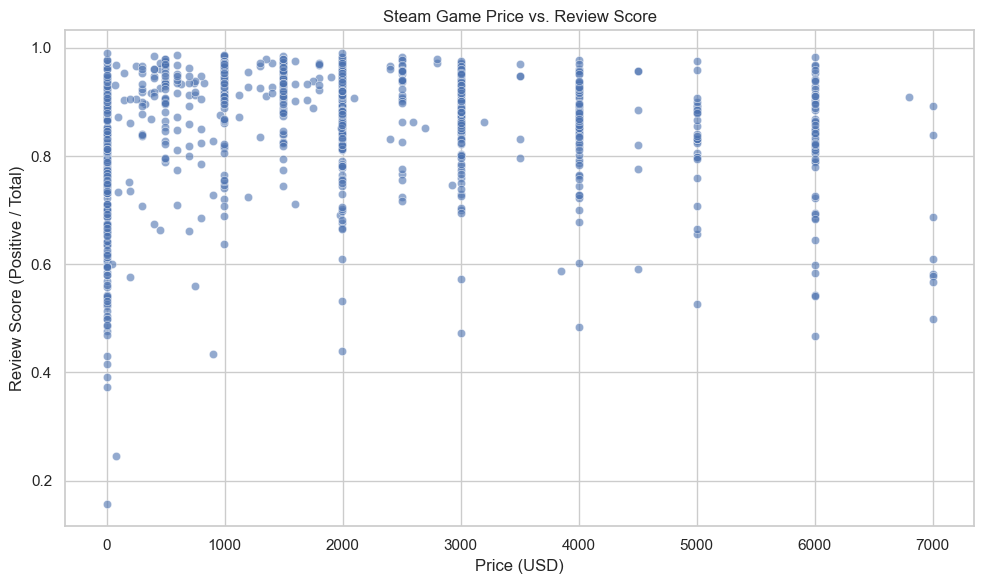

In [17]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="price", y="review_score", alpha=0.6)

plt.title("Steam Game Price vs. Review Score")
plt.xlabel("Price (USD)")
plt.ylabel("Review Score (Positive / Total)")
plt.tight_layout()
plt.show()

In [18]:
correlation = df[["price", "review_score"]].corr().loc["price", "review_score"]
print(f"Correlation between price and review score: {correlation:.3f}")

Correlation between price and review score: 0.065
